In [1]:
from atomphys.data_utils.load_data import from_json, from_nist
from atomphys.electric_field import GaussianBeam
from atomphys.calc.hamiltonians import H0, H_detuning, H_zeeman, H_int_offdiagonal, collapse_operators
from atomphys.calc.linewidths import transition_specific_linewidth
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

In [4]:
Ca = from_json('../data/Ca_mills.json')
u = Ca._ureg

Loading atom Ca
Added 75 states
Added 811 transitions


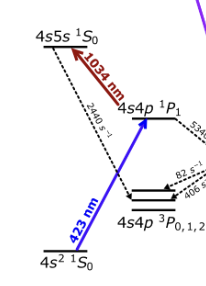

In [8]:
_1S0 = Ca.get_state('1S0')
_1P1 = Ca.get_state('1P1')
_1S0u = Ca.get_state('3p6.4s.5s 1S0')

states = [_1S0, _1P1, _1S0u]
_1S0_to_1P1 = Ca.transition_between(_1S0, _1P1)
_1P1_to__1S0u = Ca.transition_between(_1P1, _1S0u)

In [6]:
def get_rho(atom, states, lasers, det_blue, det_red, B, u):
    H_i = H_int_offdiagonal(states, lasers, u)
    H = H_i + H_detuning(states, [0*u('MHz'), det_blue, det_red], u) + H_zeeman(states, B)
    co = collapse_operators(atom, states, u)
    ss = qt.steadystate(H, co)
    return np.diagonal(np.array(ss))

In [11]:
p_red = 3*u('mW')
p_blue = 0.00001*u('mW')
waist_red = 1.15*u('mm')
waist_blue = 1.6*u('mm')
polarization_red = np.array([1, 0, 0])
polarization_blue = np.array([1, 1j, 0])
direction_red = np.array([0, 0, 1])
direction_blue = np.array([0, 0, 1])


lasers = {
    GaussianBeam(polarization=polarization_red, direction_of_propagation=direction_red, frequency = _1P1_to__1S0u.frequency, power=p_red, waist=waist_red, _ureg=u): [_1P1_to__1S0u],
    GaussianBeam(polarization=polarization_blue, direction_of_propagation=direction_blue, frequency = _1S0_to_1P1.frequency, power=p_blue, waist=waist_blue, _ureg=u): [_1S0_to_1P1]
}

In [18]:
B = 0*u('G')
det_red = 10 * u('MHz')
dets_blue = np.linspace(-50, 40, 61) * u('MHz')
pops = np.zeros(dets_blue.shape[0])

for i, det_blue in enumerate(dets_blue):
    for l in ls:
        pop = get_rho(Ca, states, l, det_blue, det_red, B, u)
        pops[i] += pop[1]+pop[2]+pop[3]

/var/folders/9y/fvf_8jss32ncj7qhg3shd7lh0000gn/T/ipykernel_8582/297348533.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  pops[i] += pop[1]+pop[2]+pop[3]


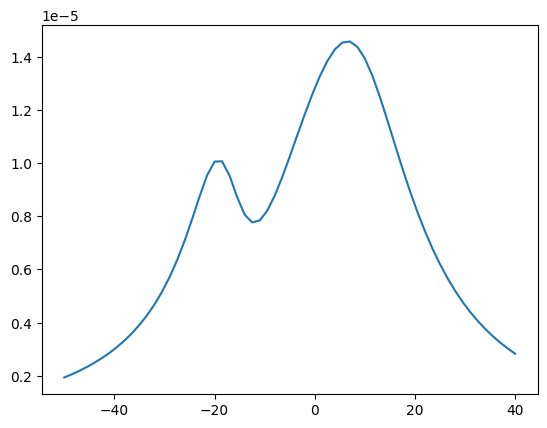

In [19]:
plt.plot(dets_blue, pops)

In [21]:
H_i = H_int_offdiagonal(states, lasers, u)

In [22]:
H_i

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[  0.           0.           0.          -0.22138954   0.        ]
 [  0.           0.           0.           0.         -60.56855383]
 [  0.           0.           0.           0.           0.        ]
 [ -0.22138954   0.           0.           0.          60.56855383]
 [  0.         -60.56855383   0.          60.56855383   0.        ]]